<a href="https://colab.research.google.com/github/GrippM/Desafio-Re-Start---Data-Girls-Neuron/blob/main/Desafio_(Re)Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio (Re)Start 

Base de dados retirada do Kaggle: 
# Mushroom Classification

Safe to eat or deadly poison?

# Arquivo disponível no site Kaggle

https://www.kaggle.com/uciml/mushroom-classification

# **Attribute Information:** (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

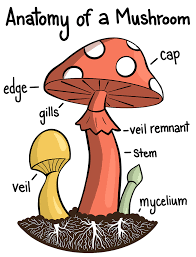

O principal desafio desse conjunto de dasdos é trabalhar com dados qualitativos nominais, os quais estão distantes da minha experiência (já que é desafio, eu também me desafiei).
Os dados sugerem fortemente um sistema de classificação que leva em conta as características morfológicas do cogumelo para classificá-lo em comestível e venenoso. 
A partir dos dados, dois modelos podem ser analisados: Classificação e Agrupamento. Neste trabalho será utilizado Agrupamento. Para trabalhar com variáveis categóricas utilizarei o 'KModes clustering' que usa a dissimilaridade para o cálculo (e não distancias, como nos dados quantitativos).


# Instalação das bibliotecas que serão necessárias para realizar a análise

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn

# Carregar arquivo

In [ ]:
!pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving mushrooms.csv to mushrooms (2).csv
User uploaded file "mushrooms.csv" with length 374003 bytes


In [ ]:
link = 'https://drive.google.com/file/d/1kwMn_4MgFdFFCWS000vhJAW8HZxd-Dj4/view?usp=sharing'


In [ ]:
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('mushrooms.csv')   
  
df = pd.read_csv('mushrooms.csv') 
print(df)

     class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]


In [ ]:
#df = pd.read_csv('/content/mushrooms.csv')  --> Para carregar arquivo direto do colab, caso prefira baixar.
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


# Análise exploratória: conhecendo os dados

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


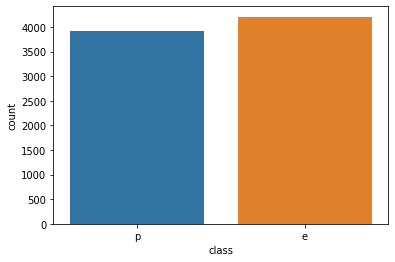

In [ ]:
sns.countplot(df['class'])

Observa-se que as quantidades de cogumelos venenosos e comestíveis são balanceadas, o que possibilita a criação de modelos não enviesados. 

# Cobertura da superfície

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

In [ ]:
df.groupby('cap-surface')['class'].value_counts()

cap-surface  class
f            e        1560
             p         760
g            p           4
s            p        1412
             e        1144
y            p        1740
             e        1504
Name: class, dtype: int64

A partir desse agrupamento pode-se ver que no grupo dos cogumelos que apresentam cobertura da superfície (cap-surface) com ranhuras (grooves=g) todos são venenosos.

# Odor

In [ ]:
df.groupby('odor')['class'].value_counts()

odor  class
a     e         400
c     p         192
f     p        2160
l     e         400
m     p          36
n     e        3408
      p         120
p     p         256
s     p         576
y     p         576
Name: class, dtype: int64

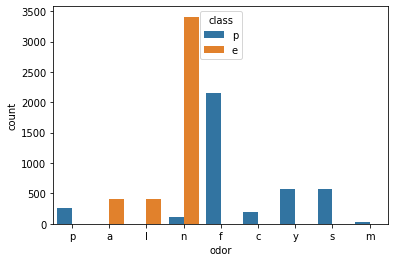

In [ ]:
sns.countplot(data=df, x='odor', hue='class')

Observa-se a partir desse agrupamento pelo odor, que todos os cogumelos que tem cheiro de amêndoa (almond=a) são comestíveis; todos que tem cheiro de creosoto (creosoto = c) são venenosos, todos que tem cheiro repugnante (repugnante = f) são venenosos; todos que tem odor de anis (anise=l) são comestíveis; todos os bolorentos (musty=m) são venenosos; os de cheiro ácido (pungent=p) são venenosos; os de cheiro picante (spicy=s) são venenosos; todos os que tem cheiro de peixe (fishy=y) são venenosos e os que não apresentam odor (none=n) podem ser comestíveis ou venenosos





# Habitat

In [ ]:
df.groupby('habitat')['class'].value_counts()

habitat  class
d        e        1880
         p        1268
g        e        1408
         p         740
l        p         592
         e         240
m        e         256
         p          36
p        p        1008
         e         136
u        p         272
         e          96
w        e         192
Name: class, dtype: int64

Já nesse agrupamento por habitat observa-se que apenas os cogumelos que colonizam rejeitos são 100% comestíveis. Nos demais hábitats encontramos cogumelos tanto venonosos quanto comestíveis. 

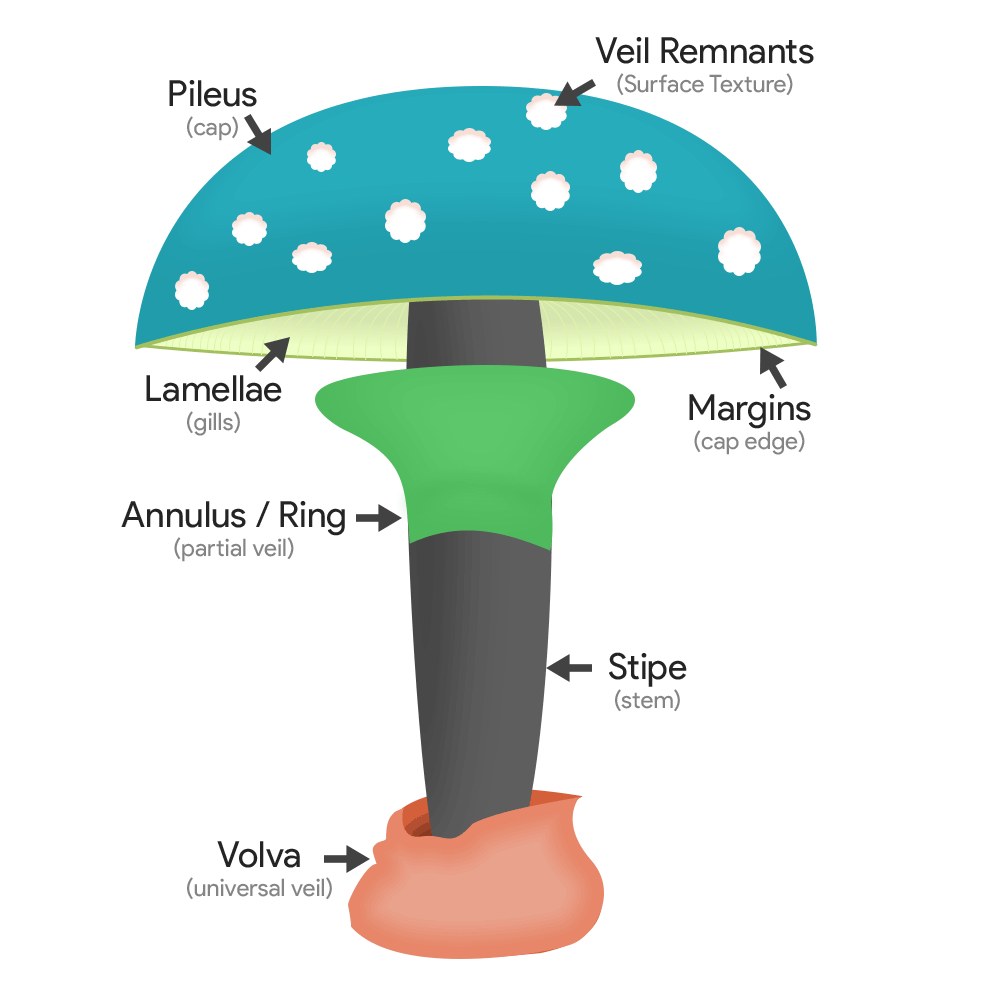

# Coloração da textura da superfície (veil-color)

veil-color: brown=n,orange=o,white=w,yellow=y

In [ ]:
df.groupby('veil-color')['class'].value_counts()

veil-color  class
n           e          96
o           e          96
w           e        4016
            p        3908
y           p           8
Name: class, dtype: int64

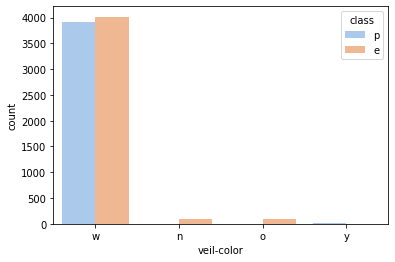

In [ ]:
sns.countplot(data=df, x='veil-color', hue='class', palette='pastel')


Fazendo um agrupamento pelo formato da cobertura: 
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

# Formato da cobeturtura

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s



In [ ]:
df.groupby('cap-shape')['class'].value_counts()

cap-shape  class
b          e         404
           p          48
c          p           4
f          e        1596
           p        1556
k          p         600
           e         228
s          e          32
x          e        1948
           p        1708
Name: class, dtype: int64

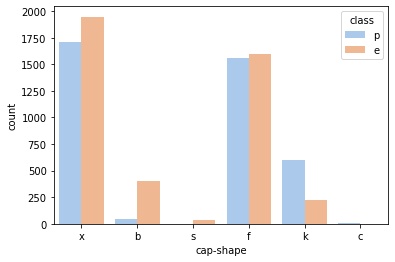

In [ ]:
sns.countplot(data=df, x='cap-shape', hue='class', palette='pastel')

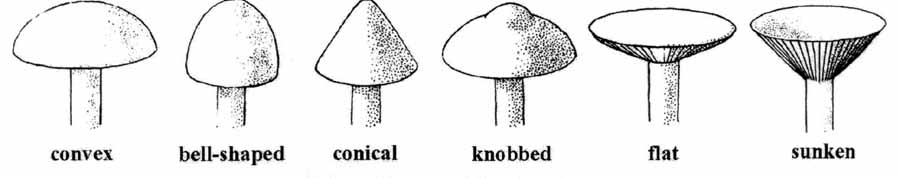

Observa-se que todos os cogumelos cujo formato da cobertura é cônico (conical=c) são venenosos, apesar de serem muito poucos. E todos os cogumelos de cobertura afundada (sunken=s) são comestíveis.


# Cor da cobertura

In [ ]:
df.groupby('cap-color')['class'].value_counts()

cap-color  class
b          p         120
           e          48
c          e          32
           p          12
e          p         876
           e         624
g          e        1032
           p         808
n          e        1264
           p        1020
p          p          88
           e          56
r          e          16
u          e          16
w          e         720
           p         320
y          p         672
           e         400
Name: class, dtype: int64

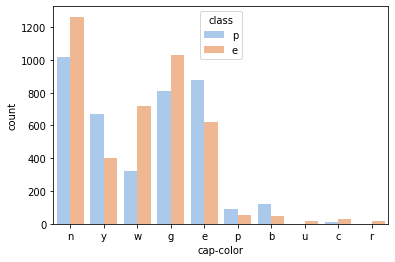

In [ ]:
sns.countplot(data=df, x='cap-color', hue='class', palette='pastel')
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

# População

In [ ]:
df.groupby('population')['class'].value_counts()
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

population  class
a           e         384
c           e         288
            p          52
n           e         400
s           e         880
            p         368
v           p        2848
            e        1192
y           e        1064
            p         648
Name: class, dtype: int64

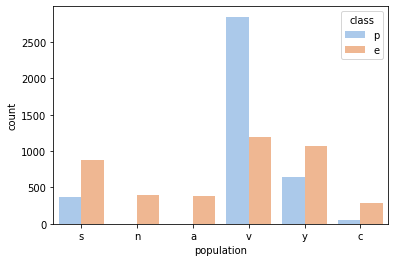

In [ ]:
sns.countplot(data=df, x='population', hue='class', palette='pastel')

É interessante notar que todos os cogumelos classificados como abundantes são comestíveis, a maioria dos que apresentam as populações em cluster também são comestíveis, os que tem como característica serem numerosos também. 

## Dos cogumelos comestíveis

In [ ]:
selecao_edible = df['class'].isin(['e'])
selecao_edible

0       False
1        True
2        True
3       False
4        True
        ...  
8119     True
8120     True
8121     True
8122    False
8123     True
Name: class, Length: 8124, dtype: bool

In [ ]:
class_edible = df[selecao_edible]
class_edible

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,v,l
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l


In [ ]:
class_edible.describe().T

,count,unique,top,freq
class,4208,1,e,4208
cap-shape,4208,5,x,1948
cap-surface,4208,3,f,1560
cap-color,4208,10,n,1264
bruises,4208,2,t,2752
odor,4208,3,n,3408
gill-attachment,4208,2,f,4016
gill-spacing,4208,2,c,3008
gill-size,4208,2,b,3920
gill-color,4208,10,w,956


# **Aplicação da análise de Agrupamento KModes**


O primeiro passo é retirar a coluna 'class' pois esse é o dado que queremos testar. Pode-se retirar também o coluna veil-type pois apresenta apenas um valor para todas as amostras (linhas).



In [ ]:
var_morfo = df.drop(columns = ['class'])
var_morfo.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
alvo = df[['class']]
alvo.head()

,class
0,p
1,e
2,e
3,p
4,e


In [ ]:
var_morfo = var_morfo.drop(columns= ['veil-type'])
var_morfo.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


In [ ]:
from sklearn import preprocessing

In [ ]:
encoder = preprocessing.LabelEncoder()
encoded_var_morfo = var_morfo.apply(encoder.fit_transform)
encoded_var_morfo.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


Apesar de saber que queremos separar os cogumelos em dois grupos distinto, vamos aplicar a curva do cotovelo para determinar quantos grupos serão formados:

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 74778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 74778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 74778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 74778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 74778.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 739, cost: 62474.0
Run 1, iteration: 2/100, moves: 43, cost: 62474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1865, cost: 66344.0
Run 2, iteration: 2/

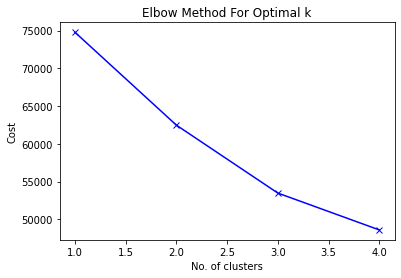

In [ ]:
#Curva do cotovelo para encontrar o número ideal de grupos
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(encoded_var_morfo)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


Pode-se observar que serão formados dois grupos.

# Construindo o modelo com dois grupos

In [ ]:

kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(encoded_var_morfo)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1643, cost: 68582.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 597, cost: 62950.0
Run 2, iteration: 2/100, moves: 389, cost: 62474.0
Run 2, iteration: 3/100, moves: 9, cost: 62474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2562, cost: 63851.0
Run 3, iteration: 2/100, moves: 323, cost: 63851.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 875, cost: 64972.0
Run 4, iteration: 2/100, moves: 197, cost: 64972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2595, cost: 65181.0
Run 5, iteration: 2/100, moves: 523, cost: 65181.0
Best run was number 2


array([1, 1, 1, ..., 1, 0, 1], dtype=uint16)

In [ ]:
encoded_var_morfo.insert(0, "Cluster", clusters, True)
encoded_var_morfo.head()

,Cluster,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [ ]:
encoded_var_morfo.insert(1, "class_", df['class'], True)
encoded_var_morfo.head()

,Cluster,class_,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,p,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,1,e,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,1,e,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,p,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,1,e,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [ ]:
encoded_var_morfo.groupby('Cluster')['class_'].value_counts()

Cluster  class_
0        p         3100
         e           68
1        e         4140
         p          816
Name: class_, dtype: int64

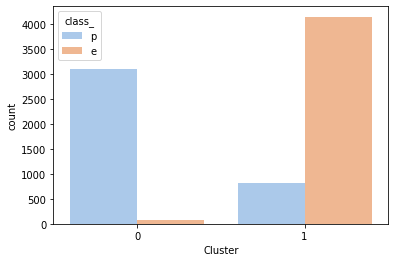

In [ ]:
sns.countplot(data=encoded_var_morfo, x='Cluster', hue='class_', palette='pastel')

Observa-se que a análise de agrupamento foi capaz de separar os dois grupos de teste alvo, apesar de termos alguns cogumelos venenosos que estão no grupo de comestíveis, e vice-versa (iihh! o.O). Segue-se então para a avaliação do modelo de predição.

# Rand index

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is:

RI = (number of agreeing pairs) / (number of pairs)

Perfectly matching labelings have a score of 1 even

(scikit-learn.org)

In [ ]:
encoded_alvo = alvo.apply(encoder.fit_transform)


In [ ]:
labels = pd.DataFrame()
labels['alvo'] = encoded_alvo.values.reshape(1, -1).tolist()[0]
labels['predicao'] = clusters
labels.value_counts(["alvo", "predicao"])

alvo  predicao
0     1           4140
1     0           3100
      1            816
0     0             68
dtype: int64

In [ ]:
labels['alvo'].value_counts()

0    4208
1    3916
Name: alvo, dtype: int64

In [ ]:
labels['predicao'].value_counts()

1    4956
0    3168
Name: predicao, dtype: int64

In [ ]:
from sklearn.metrics.cluster import rand_score
rIndex = rand_score(labels['alvo'], labels['predicao'])
print(f'O Rand Index é: {rIndex}')

O Rand Index é: 0.8060300477402671


# Confusion Matrix

Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix  is such that  is equal to the number of observations known to be in group  and predicted to be in group .
(scikit-learn.org)

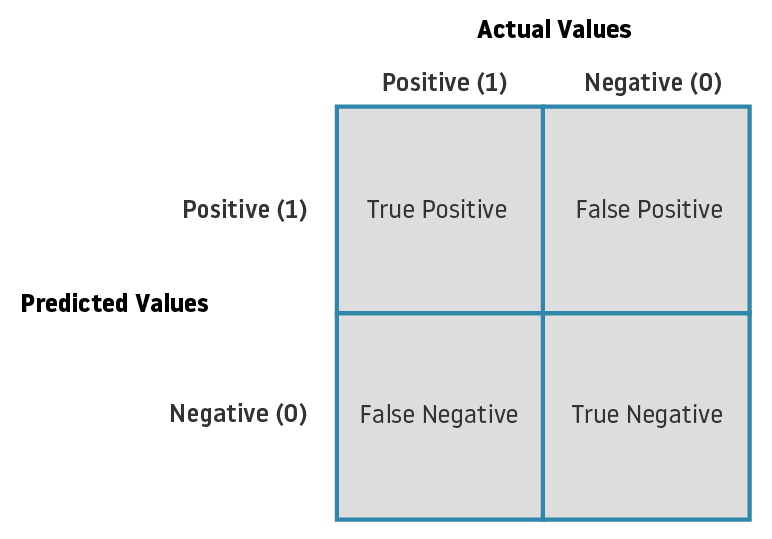

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels['alvo'], labels['predicao'])


array([[  68, 4140],
       [3100,  816]])

In [ ]:
print (pd.crosstab(labels['alvo'], labels['predicao'], rownames = ['Alvo'], colnames= ['Predição'], margins= True))

Predição     0     1   All
Alvo                      
0           68  4140  4208
1         3100   816  3916
All       3168  4956  8124


Pode-se inferir que apesar do modelo apresentar falsos-negativos (cogumelos venenosos classificados como comestíveis), e falsos-positivos (cogumelos comestíveis que foram classificados como venenosos), o modelo de agrupamento foi eficiente em separar dois grupos a partir das características morfológicas apresentadas.